<a href="https://colab.research.google.com/github/bbberylll/ESAA_OB/blob/main/ESAA_OB_M12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5장 합성곱 신경망 1

## 5.1 - 합성곱 신경망
: 순전파 과정에 따라 계산된 오차 정보가 출력층->은닉층->입력층으로 전송됨. >> 계산이 복잡하고 resource가 많이 필요함.

--> **전체를 한 번에 계산하지 말고 이미지의 국소적인 부분을 계산해 시간과 자원을 절약하자는 것**

### 5.1.1 & 2 : 합성곱층의 필요성과 구조
1. 필요성 : 이미지의 경우 fully-connected로 펼쳐서 input으로 넣을 경우 이미지 데이터의 공간적 구조 정보를 무시하는 것 >> 이를 보완하는 합성곱층

2. 합성곱 신경망 구조
= 입력층, (합성곱층+ReLU, 풀링층), 완전연결층, 출력층(softmax 함수)

  - 입력층 : 이미지 = 높이, 너비, 채널값을 가짐.

  - 합성곱층 : 입력 데이터에서 특성을 추출 by) 커널(필터) >> feature map이 추출됨
      - 커널 = stride, 크기
        - 커널이 이미지를 돌아다니면서 elementwise 곱을 수행
        - stride = 한 곳에서 연산들을 수행하고 다음 장소로 이동할 때 넘어가는 칸 갯수
      
      - 채널 : 채널 1개 = 그레이 이미지, 채널 3개 RGB 이미지
        - 모두 동일하지만, 필터의 갯수와 추출된 feature map의 갯수가 다름.
      
      - 입력 데이터 = W*H*D
      - 하이퍼 파라미터 : 필터 갯수 K, 필터 크기 F, 스트라이드 : S, 패딩 : P
      - 출력 데이터 :
          1. W2 = ((W1-F+2P)/S) +1,
          2. H2 = ((H1-F+2P)/S) +1,
          3. D2 = K

  - 풀링층 = 특성맵을 다운 샘플링해 연산량을 감소, 주요 특성을 추출
    - max pooling, average pooling
    - 대부분 max pooling을 사용함
        - 입력 데이터 = W*H*D
        - 하이퍼 파라미터 : 필터 크기 F, 스트라이드 S
        - 출력 데이터 :
          1. W2 = ((W1-F)/S) +1,
          2. H2 = ((H1-F)/S) +1,
          3. D2 = D1

  - 완전연결층 : 3차원 벡터가 1차원 벡터로 펼쳐지게 됨 (flatten 과정)

  - 출력층 : SoftMax 활성화 함수를 사용해 0~1 값을 출력함.

### 5.1.3 : 1D, 2D, 3D 합성곱
1. 1D 합성곱 : 필터가 시간을 축으로 좌우로만 이동 가능
  - 입력 W와 필터 k에 대한 출력은 W가 됨.


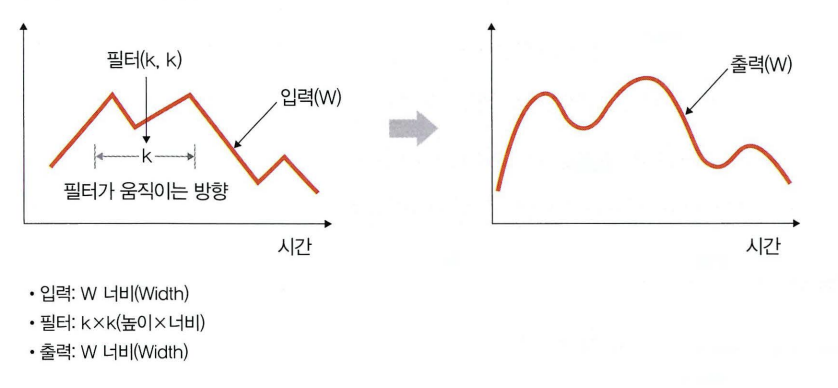


2. 2D 합성곱 : 필터가 방향 2개로 움직임.
  - 입력 (W, H)와 필터 (k, k)에 대한 출력은 (W, H)가 됨
  


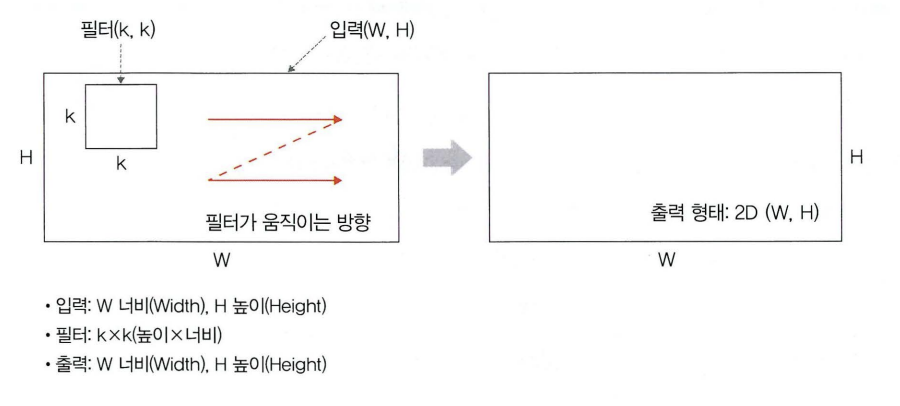

3. 3D 합성곱 : 필터가 움직이는 방향이 3개임.
- 입력 (W, H, L)와 필터 (k, k, d)를 적용하면 출력은 (W, H, L)이 됨.
- 이 때 d < L이어야 함.

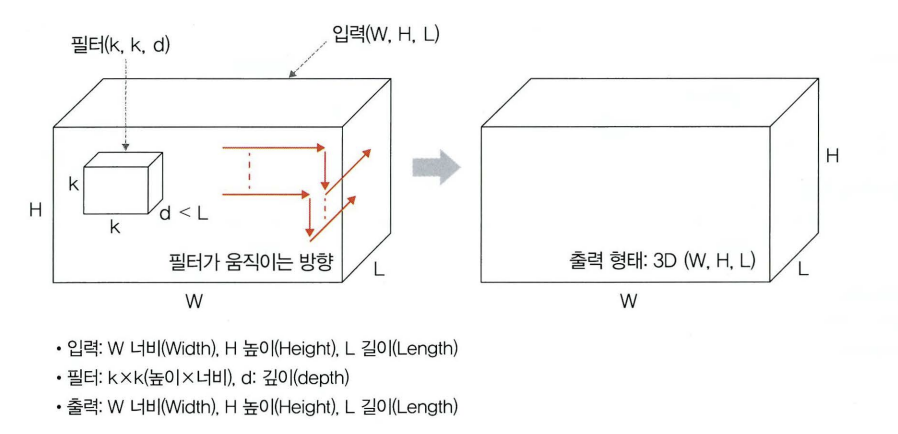



4. 3D 입력을 갖는 2D 합성곱
: 필터에 대한 길이 L이 입력 채널의 길이 L과 같아야 함.

  - ex) LeNet-5, VGG

5. 1*1 합성곱
: 연산량 갑소 효과, ex) GoogLeNet